#Data Importing and Cleaning


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Importing data
df = pd.read_csv("/content/IEA-methane-emissions-data.csv")
df

,region,country,emissions,source,type,segment,reason,baseYear,notes
0,Africa,Algeria,280.700165,IEA,Agriculture,Total,All,2018-2019,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.044000,IEA,Energy,Bioenergy,All,2021,"Estimates from end-uses are for 2019 (IEA, Gre..."
2,Africa,Algeria,120.014000,IEA,Energy,Gas pipelines and LNG facilities,Fugitive,2021,"Estimates from end-uses are for 2019 (IEA, Gre..."
3,Africa,Algeria,64.416298,IEA,Energy,Gas pipelines and LNG facilities,Vented,2021,"Estimates from end-uses are for 2019 (IEA, Gre..."
4,Africa,Algeria,0.000000,IEA,Energy,Offshore gas,Fugitive,2021,"Estimates from end-uses are for 2019 (IEA, Gre..."
...,...,...,...,...,...,...,...,...,...
2117,World,NaN,3377.199951,IEA,Energy,Satellite-detected large leaks,All,2021,"Estimates from end-uses are for 2019 (IEA, Gre..."
2118,World,NaN,28021.300780,IEA,Energy,Steam coal,All,2021,"Estimates from end-uses are for 2019 (IEA, Gre..."
2119,World,NaN,135231.718800,IEA,Energy,Total,All,2021,"Estimates from end-uses are for 2019 (IEA, Gre..."
2120,World,NaN,7277.776367,IEA,Other,Total,All,2018-2019,Average based on United Nations Framework Conv...


In [ ]:
df.shape

(2122, 9)

In [ ]:
df.columns

Index(['region', 'country', 'emissions', 'source', 'type', 'segment', 'reason',
       'baseYear', 'notes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122 entries, 0 to 2121
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     2122 non-null   object 
 1   country    2100 non-null   object 
 2   emissions  2122 non-null   float64
 3   source     2122 non-null   object 
 4   type       2122 non-null   object 
 5   segment    2122 non-null   object 
 6   reason     2122 non-null   object 
 7   baseYear   2122 non-null   object 
 8   notes      2122 non-null   object 
dtypes: float64(1), object(8)
memory usage: 149.3+ KB


In [ ]:
df.describe()

,emissions
count,2122.000000
mean,464.725725
std,4789.784015
min,0.000000
25%,0.000000
50%,4.310215
75%,62.489849
max,141380.171900


In [ ]:
#Checking for duplicates in data
dp = df.duplicated()
sum(dp)

0

In [ ]:
#Checking for missing values
df.isna().sum()

,0
region,0
country,22
emissions,0
source,0
type,0
segment,0
reason,0
baseYear,0
notes,0


In [ ]:
#Removing Missing values
df.dropna(inplace=True)

In [ ]:
#Again checking for missing values
df.isna().sum()

,0
region,0
country,0
emissions,0
source,0
type,0
segment,0
reason,0
baseYear,0
notes,0


#Insights with Visualization

country
China            86770.714920
United States    48446.501483
Russia           42985.701295
India            37078.812746
Brazil           21104.117321
Indonesia        17930.363298
Other            14366.299406
Iran             12790.499593
Turkmenistan     10059.093664
Nigeria           9767.901691
Name: emissions, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------


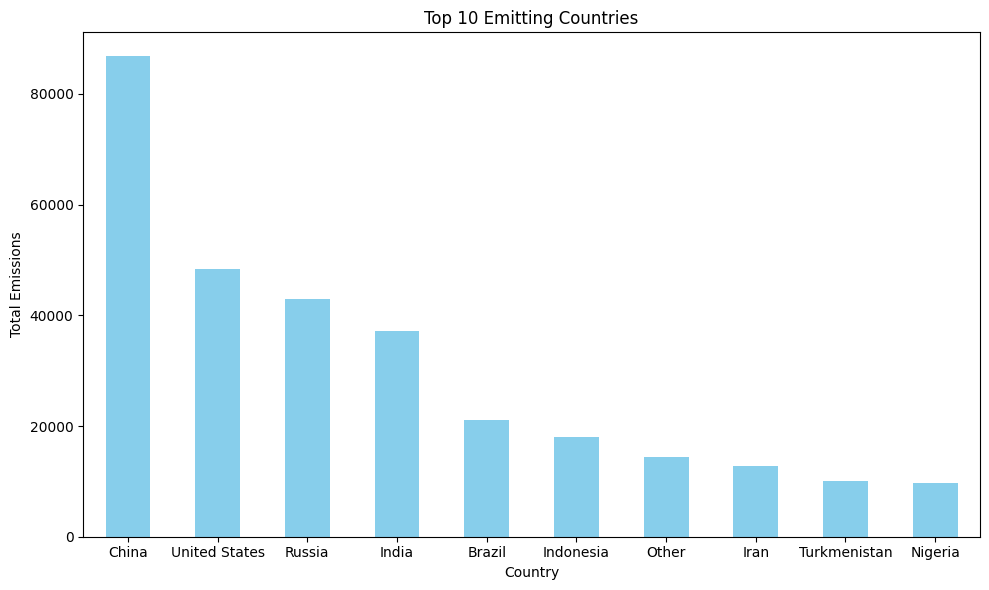

In [ ]:
#Top 10 Emitting Countries
top_countries = df.groupby('country')['emissions'].sum().sort_values(ascending=False).head(10)
print(top_countries)
print('------------------------------------------------------------------------------------------------------------------------------------')

# Visualization of Top 10 Emitting Countries
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Emitting Countries')
plt.xlabel('Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

type
Energy         270289.455304
Agriculture    143140.854359
Waste           73094.164601
Other            7502.690756
Name: emissions, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------


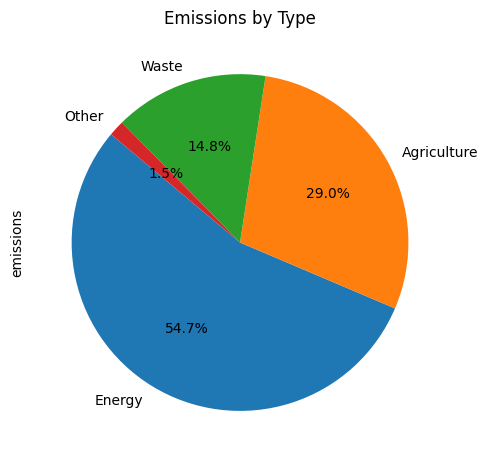

In [ ]:
# Emissions by Type
emissions_by_type = df.groupby('type')['emissions'].sum().sort_values(ascending=False)
print(emissions_by_type)
print('------------------------------------------------------------------------------------------------------------------------------------')

# Visualization of Emissions by Type
plt.figure(figsize=(5,5))
emissions_by_type.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Emissions by Type')
plt.tight_layout()
plt.show()


baseYear
2018-2019    223737.709717
2021         270289.455304
Name: emissions, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------


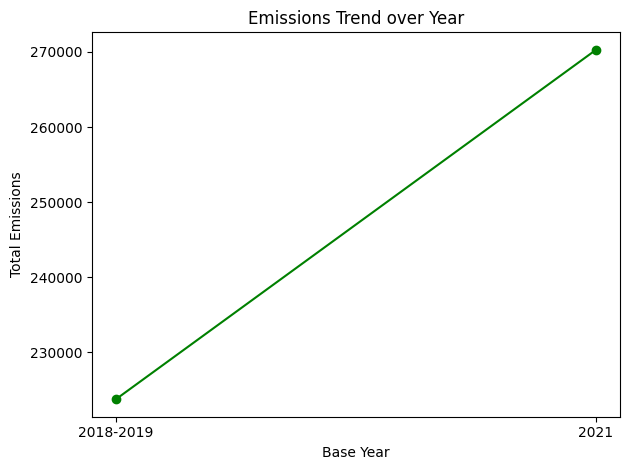

In [ ]:
# Emission Trend Over Years
emissions_by_year = df.groupby('baseYear')['emissions'].sum()
print(emissions_by_year)
print('------------------------------------------------------------------------------------------------------------------------------------')

# Visualization of Emissions Trend Over Years
plt.plot(emissions_by_year.index, emissions_by_year.values, marker='o', color='green')
plt.title('Emissions Trend over Year')
plt.xlabel('Base Year')
plt.ylabel('Total Emissions')
plt.xticks(emissions_by_year.index)
plt.tight_layout()
plt.show()


type                        Agriculture        Energy        Other  \
region                                                               
Africa                     17321.131497  28105.930839  1684.774999   
Asia Pacific               70955.541602  91044.984884  4381.744077   
Central and South America  23757.997347  12945.752419   362.287197   
Europe                     12510.783132   8188.348473   527.453393   
Middle East                 1556.841165  31704.778292    89.359890   
North America              12838.951294  41810.636785   310.118164   
Other                          0.000000   2106.340268     0.000000   
Russia & Caspian            4199.608322  54382.683344   146.953037   

type                              Waste  
region                                   
Africa                      9163.271533  
Asia Pacific               30904.050333  
Central and South America   6958.500338  
Europe                      9366.686033  
Middle East                 3971.008842  
North

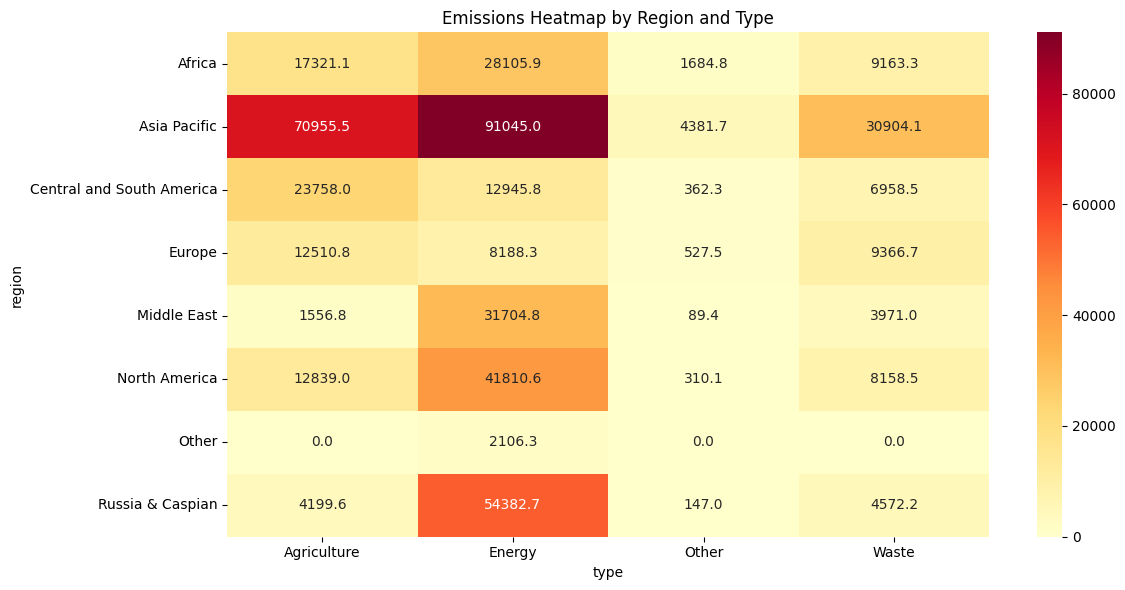

In [ ]:
#Emissions by Region and Type
pivot_heatmap = df.pivot_table(values='emissions', index='region', columns='type', aggfunc='sum', fill_value=0)
print(pivot_heatmap)
print('------------------------------------------------------------------------------------------------------------------------------------')

# Visualization of Emissions by Region and Type
plt.figure(figsize=(12,6))
sns.heatmap(pivot_heatmap, cmap='YlOrRd', annot=True, fmt='.1f')
plt.title('Emissions Heatmap by Region and Type')
plt.tight_layout()
plt.show()


#Sector-Wise Emission Analysis and Recommended Solutions


1.***Asia Pacific***

Highest emissions overall in **Agriculture (70K)** and **Energy (91K)** sectors.

Waste emissions are also significantly high (30K+).

Recommendations:

(i)Agriculture :-

- Promote alternate wetting and drying (AWD) in rice farming.

- Introduce feed additives to reduce enteric fermentation in livestock.

(ii)Energy :-

- Strengthen methane leak detection and repair (LDAR) programs in oil/gas infrastructure (especially in countries like China and India).

- Incentivize methane capture at coal mines and gas fields.

(iii)Waste :-

- Scale landfill gas capture and waste segregation systems.

- Support composting and anaerobic digestion at municipal levels.

---

2. ***Africa***

High in **Energy (28K)** and **Agriculture (17K)**.

Waste emissions also notable (~9K).

Recommendations:-

(i)Energy:-

- Improve infrastructure to reduce methane leakage during extraction and transport.

- Adopt flaring alternatives in remote oilfields.

(ii)Agriculture:-

- Support training for smallholder farmers on low-emission farming techniques.

(iii)Waste:-

- Develop basic waste collection and controlled landfill systems with methane recovery.


---


3. ***North America***

Significant emissions in **Energy (41K)** and **Waste (8K)**.

Agriculture also notable (~12K).

Recommendations:

(i)Energy:-

- Implement stricter methane limits under environmental policies.

- Expand methane abatement in shale gas and oil production.

(ii)Waste:-

- Mandate landfill gas collection and upgrading facilities.

(iii)Agriculture:-

- Encourage precision agriculture and rotational grazing to reduce emissions.


---


4. ***Russia & Caspian***

Very high Energy emissions (54K), moderate Agriculture and Waste.

Recommendations:

(i)Energy:-

- Upgrade aging pipelines and oil/gas facilities to reduce leaks.

- Utilize satellite tracking for large-scale leak detection.

(ii)Agriculture:-

- Encourage low-emission livestock feed solutions.

---

5. ***Central and South America***

High Agriculture emissions (23K), moderate Waste and Energy.

Recommendations:

(i)Agriculture:-

- Focus on sustainable cattle ranching and pasture management.

- Provide incentives for rice farmers to adopt AWD and mid-season drainage.

(ii)Waste:-

- Promote rural and urban composting programs.

---

6. ***Europe***

Highest in Waste (9.3K), and Agriculture (~12K).

Lower but present Energy emissions (8K).

Recommendations:

(i)Waste:-

- Expand zero-landfill policies and improve anaerobic digestion plants.

(ii)Agriculture:-

- Strengthen EU CAP (Common Agricultural Policy) methane reduction strategies.

(iii)Energy:-

- Continue phasing out fossil fuel subsidies.

---

***7. Middle East***

Dominated by Energy emissions (31K).

Moderate Waste emissions (~4K).

Recommendations:

(i)Energy:-

- Retrofit gas infrastructure with leak control.

- Adopt venting/flaring alternatives in desert-based oil fields.

(ii)Waste:-

- Improve municipal solid waste collection and landfill lining.

